<a href="https://www.kaggle.com/code/sandrakan/canadian-tech-labour-market?scriptVersionId=131384057" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import statsmodels.api as sm


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/canandian-labour-force-survey/pub1022.csv
/kaggle/input/canandian-labour-force-survey/pub1121.csv
/kaggle/input/canandian-labour-force-survey/pub0422.csv
/kaggle/input/canandian-labour-force-survey/pub0519.csv
/kaggle/input/canandian-labour-force-survey/pub1020.csv
/kaggle/input/canandian-labour-force-survey/pub0822.csv
/kaggle/input/canandian-labour-force-survey/pub1219.csv
/kaggle/input/canandian-labour-force-survey/pub0622.csv
/kaggle/input/canandian-labour-force-survey/pub0321.csv
/kaggle/input/canandian-labour-force-survey/pub0319.csv
/kaggle/input/canandian-labour-force-survey/pub0821.csv
/kaggle/input/canandian-labour-force-survey/pub0323.csv
/kaggle/input/canandian-labour-force-survey/pub0619.csv
/kaggle/input/canandian-labour-force-survey/pub1120.csv
/kaggle/input/canandian-labour-force-survey/pub0123.csv
/kaggle/input/canandian-labour-force-survey/pub0720.csv
/kaggle/input/canandian-labour-force-survey/pub0423.csv
/kaggle/input/canandian-labour-force-survey/pub0

In [2]:
## Import and append the data

csv_path = '/kaggle/input/canandian-labour-force-survey/*.csv'

# Get a list of all CSV files in the specified path
file_list = glob.glob(csv_path)

# Initialize an empty list to store the dataframes
dataframes = []

# Read each CSV file and append its contents to the list
for file in file_list:
    df = pd.read_csv(file)
    dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

#Remove "Not in labour force" from dataset
combined_df = combined_df[combined_df['LFSSTAT'] != 4]


In [3]:
##Replace categorical values with labels

# Define the mapping of categorical values to their corresponding text replacements
CMA_mapping = {
1:'Québec',
2:'Montréal',
3:'Ottawa–Gatineau (Ontario part)',
4:'Toronto',
5:'Hamilton',
6:'Winnipeg',
7:'Calgary',
8:'Edmonton',
9:'Vancouver',
0:'Other CMA or non-CMA'
}

AGE_12_mapping = {
1:'Gen Z',
2:'Gen Z',
3:'Millennials',
4:'Millennials',
5:'Millennials',
6:'Gen X',
7:'Gen X',
8:'Gen X',
9:'Baby Boomer',
10:'Baby Boomer',
11:'Baby Boomer',
12:'Baby Boomer or older'
}

SEX_mapping={
1:'Male',
2:'Female'}

EDUC_mapping={
0:'0 to 8 years',
1:'Some high school',
2:'High school graduate',
3:'Some postsecondary',
4:'Postsecondary certificate or diploma',
5:'Bachelors degree',
6:'Above bachelors degree'
}

IMMIG_mapping={
1:'Immigrant, landed 10 or less years earlier',
2:'Immigrant, landed more than 10 years earlier',
3:'Non-immigrant'}

EFAMTYPE_mapping={
1:'Person not in an economic family',
2:'Dual-earner couple, no children or none under 25',
3:'Dual-earner couple, youngest child 0 to 17',
4:'Dual-earner couple, youngest child 18 to 24',
5:'Single-earner couple, male employed, no children or none under 25',
6:'Single-earner couple, male employed, youngest child 0 to 17',
7:'Single-earner couple, male employed, youngest child 18 to 24',
8:'Single-earner couple, female employed, no children or none under 25',
9:'Single-earner couple, female employed, youngest child 0 to 17',
10:'Single-earner couple, female employed, youngest child 18 to 24',
11:'Non-earner couple, no children or none under 25',
12:'Non-earner couple, youngest child 0 to 17',
13:'Non-earner couple, youngest child 18 to 24',
14:'Lone-parent family, parent employed, youngest child 0 to 17',
15:'Lone-parent family, parent employed, youngest child 18 to 24',
16:'Lone-parent family, parent not employed, youngest child 0 to 17',
17:'Lone-parent family, parent not employed, youngest child 18 to 24',
18:'Other families'}

NAICS_21_mapping = {
1:'Agriculture',
2:'Forestry and logging and support activities for forestry',
3:'Fishing, hunting and trapping',
4:'Mining, quarrying, and oil and gas extraction',
5:'Utilities',
6:'Construction',
7:'Manufacturing - durable goods',
8:'Manufacturing - non-durable goods',
9:'Wholesale trade',
10:'Retail trade',
11:'Transportation and warehousing',
12:'Finance and insurance',
13:'Real estate and rental and leasing',
14:'Professional, scientific and technical services',
15:'Business, building and other support services',
16:'Educational services',
17:'Health care and social assistance',
18:'Information, culture and recreation',
19:'Accommodation and food services',
20:'Other services (except public administration)',
21:'Public administration'
}

PERMTEMP_mapping = {
1:'Permanent',
2:'Temporary, seasonal job',
3:'Temporary, term or contract job',
4:'Temporary, casual or other temporary jobs'
}

FLOWUNEM_mapping={
1:'Job losers, temporary layoff',
2:'Job losers, permanent layoff',
3:'Job leavers',
4:'Job leavers/losers (status unknown), worked more than 1 year ago ',
5:'New entrants',
6:'Re-entrants, worked 1 year ago or less',
7:'Re-entrants, worked more than 1 year ago',
8:'Future starts'
}

WHYLEFTO_mapping={
0:'Job leavers, other reasons',
1:'Job leavers, own illness or disability',
2:'Job leavers, personal or family responsibilities',
3:'Job leavers, going to school',
4:'Job losers, laid off',
5:'Job leavers, retired'
}

NOC_43_mapping = {
1:'Legislative and senior management occupations',
2:'Specialized middle management occupations',
3:'Middle management occupations in retail and wholesale trade and customer services',
4:'Middle management occupations in trades, transportation, production and utilities',
5:'Professional occupations in finance',
6:'Professional occupations in business',
7:'Administrative and financial supervisors and specialized administrative occupations',
8:'Administrative occupations and transportation logistics occupations',
9:'Administrative and financial support and supply chain logistics occupations',
10:'Professional occupations in natural sciences',
11:'Professional occupations in applied sciences (except engineering)',
12:'Professional occupations in engineering',
13:'Technical occupations related to natural and applied sciences',
14:'Health treating and consultation services professionals',
15:'Therapy and assessment professionals',
16:'Nursing and allied health professionals',
17:'Technical occupations in health',
18:'Assisting occupations in support of health services',
19:'Professional occupations in law',
20:'Professional occupations in education services',
21:'Professional occupations in social and community services',
22:'Professional occupations in government services',
23:'Occupations in front-line public protection services',
24:'Paraprofessional occupations in legal, social, community and education services',
25:'Assisting occupations in education and in legal and public protection',
26:'Care providers and public protection support occupations and student monitors, crossing guards and related occupations',
27:'Professional occupations in art and culture',
28:'Technical occupations in art, culture and sport',
29:'Occupations in art, culture and sport',
30:'Support occupations in art, culture and sport',
31:'Retail sales and service supervisors and specialized occupations in sales and services',
32:'Occupations in sales and services',
33:'Sales and service representatives and other customer and personal services occupations',
34:'Sales and service support occupations',
35:'Technical trades and transportation officers and controllers',
36:'General trades',
37:'Mail and message distribution, other transport equipment operators and related maintenance workers',
38:'Helpers and labourers and other transport drivers, operators and labourers',
39:'Supervisors and occupations in natural resources, agriculture and related production',
40:'Workers and labourers in natural resources, agriculture and related production',
41:'Supervisors, central control and process operators in processing, manufacturing and utilities and aircraft assemblers and inspectors',
42:'Machine operators, assemblers and inspectors in processing, manufacturing and printing',
43:'Labourers in processing, manufacturing and utilities'}

# Replace the categorical values with their corresponding text replacements
combined_df['CMA'] = combined_df['CMA'].replace(CMA_mapping)
combined_df['AGE_12'] = combined_df['AGE_12'].replace(AGE_12_mapping)
combined_df['SEX'] = combined_df['SEX'].replace(SEX_mapping)
combined_df['EDUC'] = combined_df['EDUC'].replace(EDUC_mapping)
combined_df['IMMIG'] = combined_df['IMMIG'].replace(IMMIG_mapping)
combined_df['EFAMTYPE'] = combined_df['EFAMTYPE'].replace(EFAMTYPE_mapping)
combined_df['NAICS_21'] = combined_df['NAICS_21'].replace(NAICS_21_mapping)
combined_df['PERMTEMP'] = combined_df['PERMTEMP'].replace(PERMTEMP_mapping).fillna('N/A')
combined_df['FLOWUNEM'] = combined_df['FLOWUNEM'].replace(FLOWUNEM_mapping)
combined_df['WHYLEFTO'] = combined_df['WHYLEFTO'].replace(WHYLEFTO_mapping)
combined_df['NOC_43'] = combined_df['NOC_43'].replace(NOC_43_mapping)


# Annualize the earnings
combined_df['HRLYEARN']=combined_df['HRLYEARN'].div(100).mul(52).mul(40).astype(float).round(2)

print(combined_df.head(5))


   REC_NUM  SURVYEAR  SURVMNTH  LFSSTAT  PROV                   CMA  \
0        1      2022        10        1    12  Other CMA or non-CMA   
1        2      2022        10        1    35               Toronto   
2        3      2022        10        1    13  Other CMA or non-CMA   
5        6      2022        10        1    59  Other CMA or non-CMA   
6        7      2022        10        1    35               Toronto   

        AGE_12  AGE_6     SEX  MARSTAT  ... LKATADS  LKANSADS  LKOTHERN  \
0  Millennials    5.0  Female        2  ...     NaN       NaN       NaN   
1  Millennials    5.0  Female        6  ...     NaN       NaN       NaN   
2        Gen X    NaN    Male        1  ...     NaN       NaN       NaN   
5        Gen X    NaN  Female        1  ...     NaN       NaN       NaN   
6  Baby Boomer    NaN  Female        1  ...     NaN       NaN       NaN   

   PRIORACT  YNOLOOK TLOLOOK SCHOOLN  \
0       NaN      NaN     NaN     1.0   
1       NaN      NaN     NaN     1.0   
2 

# In this analysis, we will answer the following questions about:

Scope of this analysis

# How has the demographics of the Canadian labour market looks over the past 5 years?
In this part, we will look at the labour market from the sex lens, the immigration lens,and the age lens.

SURVYEAR  2019  2020  2021  2022  2023
SEX                                   
Female    47.9  47.8  48.2  48.3  48.4
Male      52.1  52.2  51.8  51.7  51.6


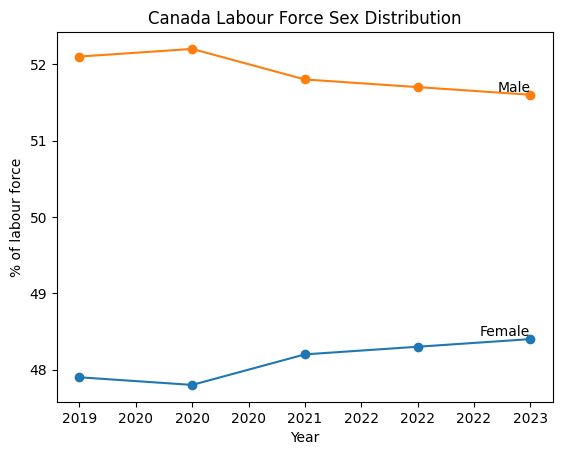

In [4]:
# Canada, Gender distribution

# Calculate the total count per column
column_totals = combined_df.groupby('SURVYEAR').size()

# Create the pivot table with percentage calculation
pivot_table_casex = combined_df.pivot_table(index='SEX', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table_casex = (pivot_table_casex.div(column_totals, axis=1) * 100).astype(float).round(1)

# Print the pivot table
print(pivot_table_casex)

# Create a line chart 
transposed_pivot = pivot_table_casex.T
ax = transposed_pivot.plot(kind='line', marker='o', legend=False)
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)

# Label each line with IMMIG values
for age in pivot_table_casex.index:
    line_data = transposed_pivot[age]
    last_value = line_data.dropna().iloc[-1]
    ax.text(line_data.index[-1], last_value, age, ha='right', va='bottom')


# Customize the plot properties
ax.set_xlabel('Year')
ax.set_ylabel('% of labour force')
ax.set_title('Canada Labour Force Sex Distribution')

# Display the plot
plt.show()

SURVYEAR                                      2019  2020  2021  2022  2023
IMMIG                                                                     
Immigrant, landed 10 or less years earlier     6.1   5.9   6.4   7.1   6.8
Immigrant, landed more than 10 years earlier  11.1  11.5  12.3  14.9  14.7
Non-immigrant                                 82.8  82.6  81.3  78.0  78.4


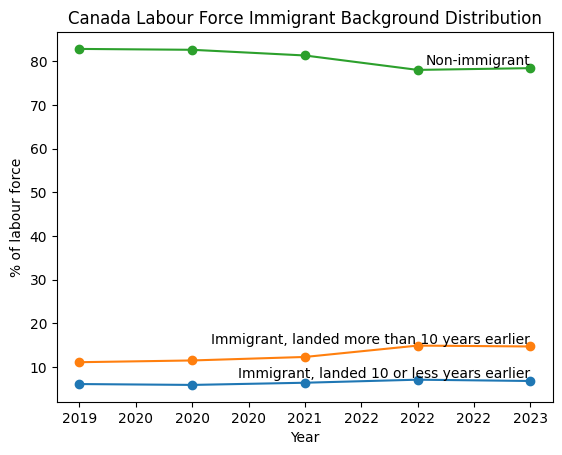

In [5]:
# Canada, Immigrant background

# Calculate the total count per column
column_totals = combined_df.groupby('SURVYEAR').size()

# Create the pivot table with percentage calculation
pivot_table_caimmig = combined_df.pivot_table(index='IMMIG', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table_caimmig = (pivot_table_caimmig.div(column_totals, axis=1) * 100).astype(float).round(1)

# Print the pivot table
print(pivot_table_caimmig)

# Create a line chart 
transposed_pivot = pivot_table_caimmig.T
ax = transposed_pivot.plot(kind='line', marker='o', legend=False)
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)

# Label each line with IMMIG values
for age in pivot_table_caimmig.index:
    line_data = transposed_pivot[age]
    last_value = line_data.dropna().iloc[-1]
    ax.text(line_data.index[-1], last_value, age, ha='right', va='bottom')


# Customize the plot properties
ax.set_xlabel('Year')
ax.set_ylabel('% of labour force')
ax.set_title('Canada Labour Force Immigrant Background Distribution')

# Display the plot
plt.show()

SURVYEAR              2019  2020  2021  2022  2023
AGE_12                                            
Gen Z                 13.3  12.2  12.2  12.5  12.0
Millennials           30.6  29.7  29.1  29.9  30.8
Gen X                 32.2  32.5  32.4  32.4  32.4
Baby Boomer           22.0  23.3  24.0  22.8  22.3
Baby Boomer or older   2.0   2.3   2.3   2.4   2.5


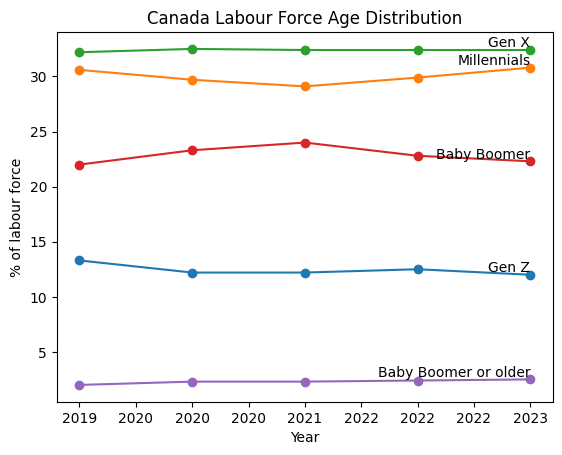

In [6]:
# Canada, Age distribution

# Calculate the total count per column
column_totals = combined_df.groupby('SURVYEAR').size()

# Create the pivot table with percentage calculation
pivot_table_caage = combined_df.pivot_table(index='AGE_12', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table_caage = (pivot_table_caage.div(column_totals, axis=1) * 100).astype(float).round(1)

# Define the desired order of the index values
age_desired_order = ['Gen Z','Millennials','Gen X','Baby Boomer','Baby Boomer or older']

# Reindex the pivot table based on the desired order of index values
pivot_table_caage = pivot_table_caage.reindex(age_desired_order)

# Print the pivot table
print(pivot_table_caage)

# Create a line chart 
transposed_pivot = pivot_table_caage.T
ax = transposed_pivot.plot(kind='line', marker='o', legend=False)
plt.gca().xaxis.set_major_formatter('{:.0f}'.format)

# Label each line with AGE_12 values
for age in pivot_table_caage.index:
    line_data = transposed_pivot[age]
    last_value = line_data.dropna().iloc[-1]
    ax.text(line_data.index[-1], last_value, age, ha='right', va='bottom')

# Customize the plot properties
ax.set_xlabel('Year')
ax.set_ylabel('% of labour force')
ax.set_title('Canada Labour Force Age Distribution')

# Display the plot
plt.show()

Overall speaking, the 2022 Canadian labour market consists of:
* 48.5% female
* 51.5% male
* The split is stable over the past 5 years.

And
* 5.3% Immigrants landed 10 or less years earlier
* 13.5% Immigrants landed more than 10 years earlier
* 81.2% Non-immigrant
* There are more immigrants over the past 5 years.

And
* Baby boomers are still the largest members in the labour force, but has declined from 27.4% to 25.4% since 2021
* Millennials and Gen Z are on the rise since 2021


These numbers should be used as benchmarks when we compare a certain occupation or industry against the overall labour market. We can draw summaries such as "The oil and gas industry has less female and less immigrant than the industry average."

# Demographics of the professional tech labour market in Canada over the past 5 years

SURVYEAR                                            2019  2020  2021  2022  \
NOC_43                                                                       
Sales and service support occupations                9.7   9.1   8.7   8.5   
Technical trades and transportation officers an...   8.4   8.3   8.1   7.5   
Sales and service representatives and other cus...   6.9   6.6   6.5   6.5   
General trades                                       4.7   4.7   4.7   4.3   
Professional occupations in education services       3.9   4.2   4.2   4.2   
Administrative and financial support and supply...   4.1   4.1   4.1   3.9   
Administrative occupations and transportation l...   3.4   3.6   3.6   3.8   
Administrative and financial supervisors and sp...   3.1   3.3   3.4   3.4   
Professional occupations in applied sciences (e...   2.1   2.4   2.6   3.3   
Retail sales and service supervisors and specia...   3.3   3.3   3.3   3.2   
Specialized middle management occupations            2.3   2.5  

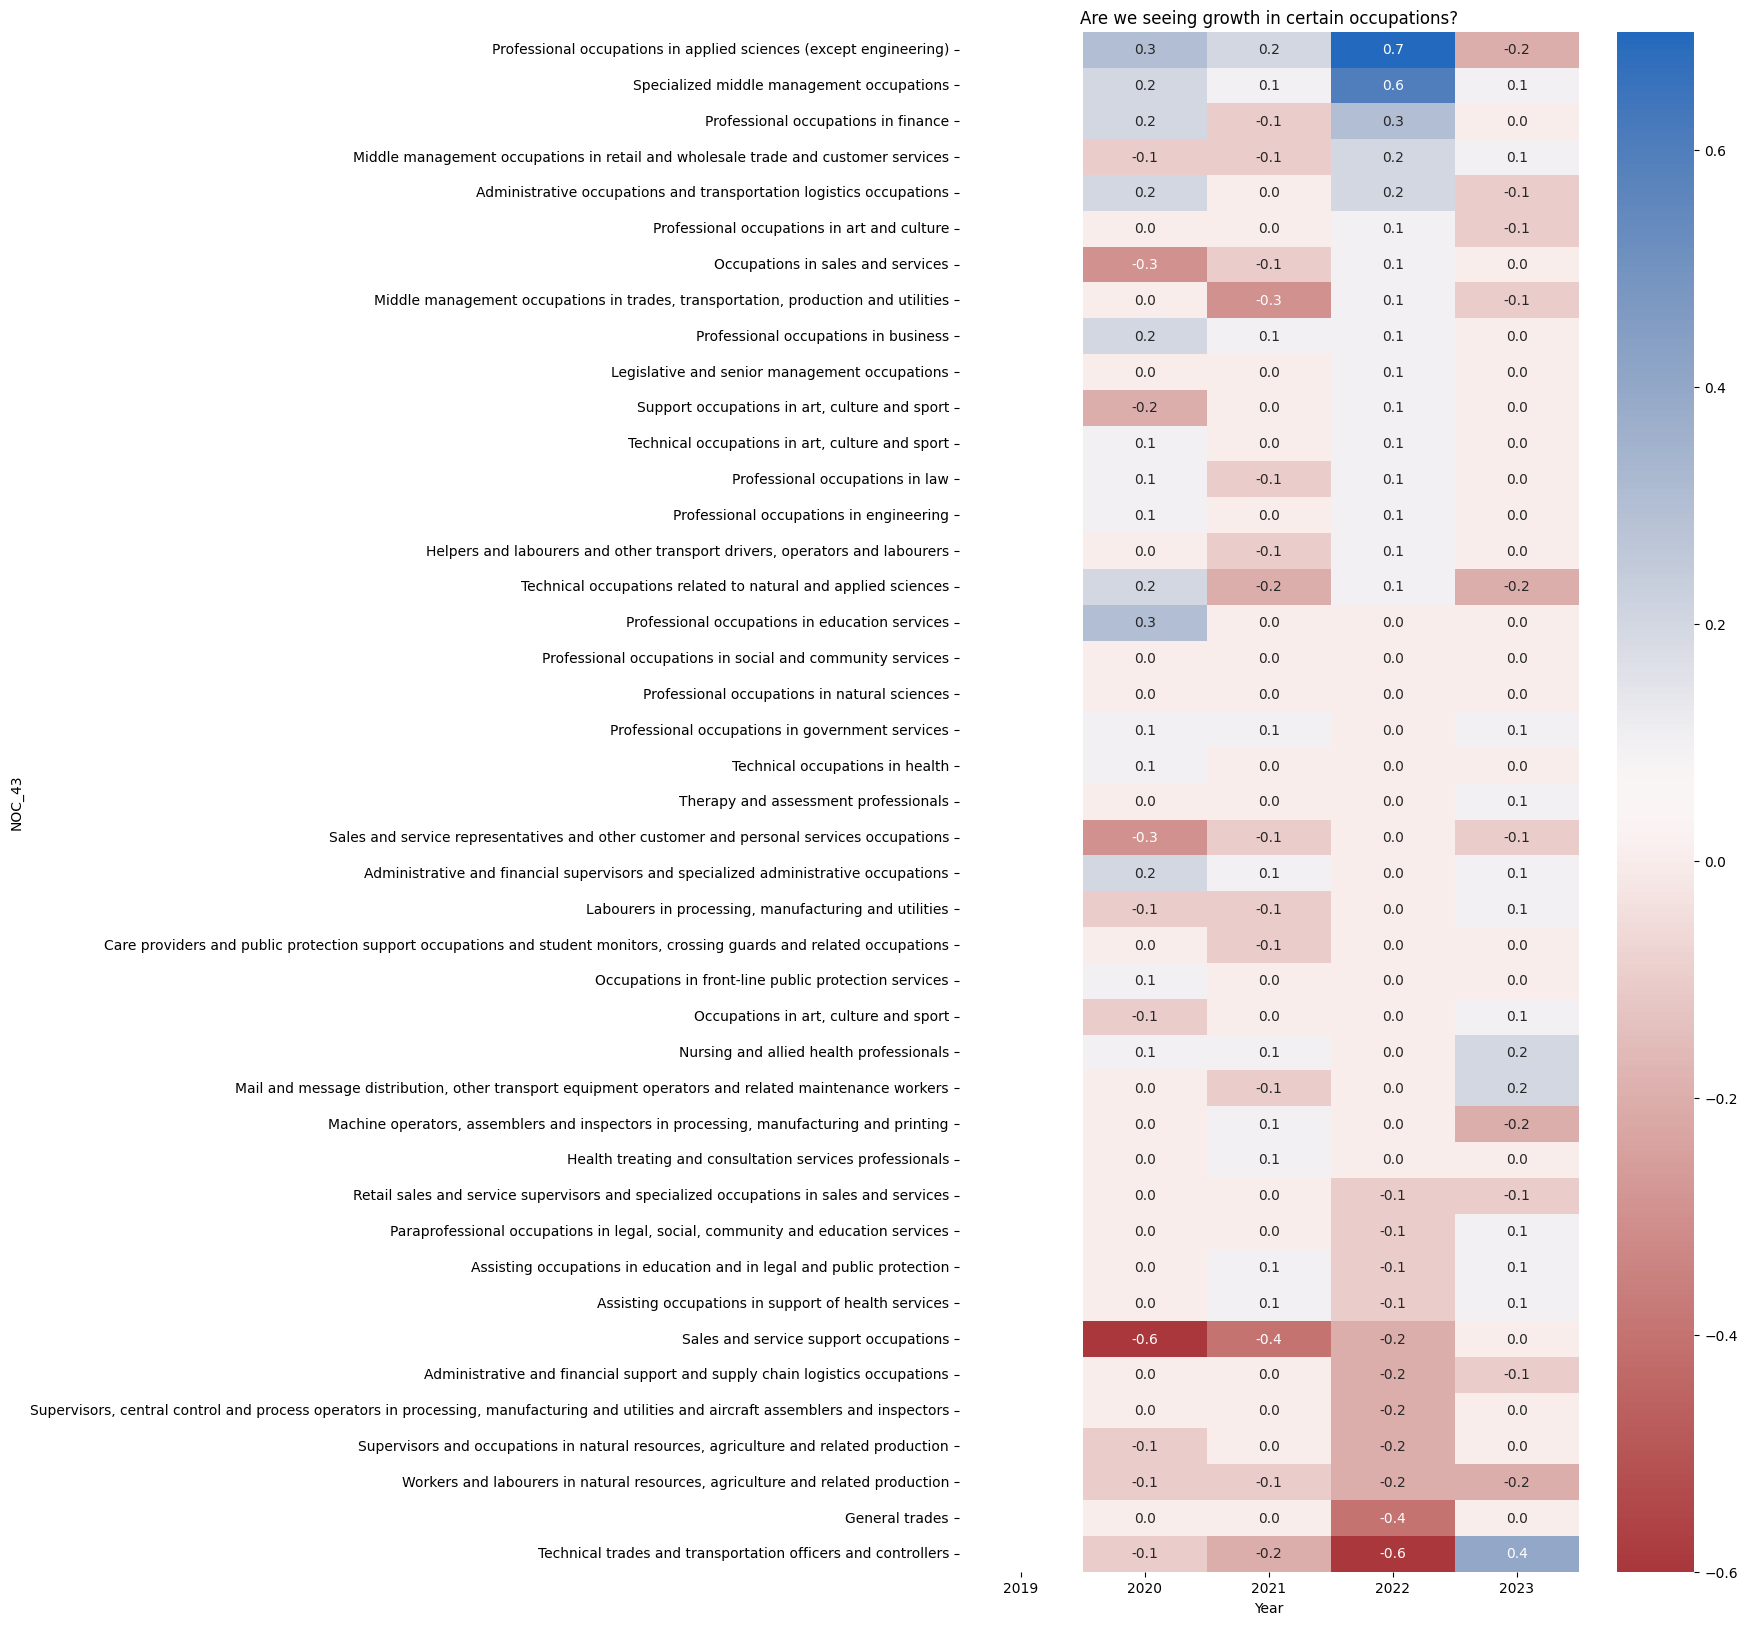

In [7]:
# Are we seeing growth in certain occupations?

# Calculate the total count per column
column_totals = combined_df.groupby('SURVYEAR').size()

# Create the pivot table with percentage calculation
pivot_table = combined_df.pivot_table(index='NOC_43', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table = (pivot_table.div(column_totals, axis=1) * 100).astype(float).round(1)

# Sort the values in ascending order based on value
sorted_pivot_table = pivot_table.sort_values(by=2022, ascending=False)

# Print the sorted pivot table
print(sorted_pivot_table)

# Calculate the difference between all columns
pivot_table_diff = pivot_table.diff(axis=1)

# Sort the values in ascending order based on value
pivot_table_diff = pivot_table_diff.sort_values(by=2022, ascending=False)

# Create a heatmap of the pivot table
plt.figure(figsize=(10, 20))
sns.heatmap(pivot_table_diff, cmap='vlag_r', annot=True, fmt='.1f', cbar=True)

# Set the plot title and labels
plt.title('Are we seeing growth in certain occupations?')
plt.xlabel('Year')
plt.ylabel('NOC_43')

# Display the heatmap
plt.show()

## NOC_43 code indicates their occupation at main job. Here's the list:
> 1. Legislative and senior management occupations
> 1. Specialized middle management occupations
> 1. Middle management occupations in retail and wholesale trade and customer services
> 1. Middle management occupations in trades, transportation, production and utilities
> 1. Professional occupations in finance
> 1. Professional occupations in business
> 1. Administrative and financial supervisors and specialized administrative occupations
> 1. Administrative occupations and transportation logistics occupations
> 1. Administrative and financial support and supply chain logistics occupations
> 1. Professional occupations in natural sciences
> 1. Professional occupations in applied sciences (except engineering)
> 1. Professional occupations in engineering
> 1. Technical occupations related to natural and applied sciences
> 1. Health treating and consultation services professionals
> 1. Therapy and assessment professionals
> 1. Nursing and allied health professionals
> 1. Technical occupations in health
> 1. Assisting occupations in support of health services
> 1. Professional occupations in law
> 1. Professional occupations in education services
> 1. Professional occupations in social and community services
> 1. Professional occupations in government services
> 1. Occupations in front-line public protection services
> 1. Paraprofessional occupations in legal, social, community and education services
> 1. Assisting occupations in education and in legal and public protection
> 1. Care providers and public protection support occupations and student monitors, crossing guards and related occupations
> 1. Professional occupations in art and culture
> 1. Technical occupations in art, culture and sport
> 1. Occupations in art, culture and sport
> 1. Support occupations in art, culture and sport
> 1. Retail sales and service supervisors and specialized occupations in sales and services
> 1. Occupations in sales and services
> 1. Sales and service representatives and other customer and personal services occupations
> 1. Sales and service support occupations
> 1. Technical trades and transportation officers and controllers
> 1. General trades
> 1. Mail and message distribution, other transport equipment operators and related maintenance workers
> 1. Helpers and labourers and other transport drivers, operators and labourers
> 1. Supervisors and occupations in natural resources, agriculture and related production
> 1. Workers and labourers in natural resources, agriculture and related production
> 1. Supervisors, central control and process operators in processing, manufacturing and utilities and aircraft assemblers and inspectors
> 1. Machine operators, assemblers and inspectors in processing, manufacturing and printing
> 1. Labourers in processing, manufacturing and utilities

In [8]:
#Filter by the National Occupation Classification
#Enter which NOC(s) you would like to see
#In my case, I want to know the labour market for 11: Professional occupations in applied sciences (except engineering)
filter_noc = ['Professional occupations in applied sciences (except engineering)']

# Filter the dataframe based on the values in the 'NOC_43' column
filtered_noc_df = combined_df[combined_df['NOC_43'].isin(filter_noc)]

# Print the combined dataframe
pd.set_option('display.max_columns', None)
print(filtered_noc_df.head(5))


    REC_NUM  SURVYEAR  SURVMNTH  LFSSTAT  PROV                   CMA  \
2         3      2022        10        1    13  Other CMA or non-CMA   
7         8      2022        10        1    35               Toronto   
23       24      2022        10        1    35               Toronto   
44       45      2022        10        1    46              Winnipeg   
80       81      2022        10        1    59             Vancouver   

         AGE_12  AGE_6     SEX  MARSTAT                    EDUC  MJH  \
2         Gen X    NaN    Male        1  Above bachelors degree  1.0   
7   Millennials    NaN    Male        6        Bachelors degree  1.0   
23        Gen X    NaN    Male        5        Bachelors degree  1.0   
44        Gen X    NaN    Male        1  Above bachelors degree  2.0   
80  Millennials    NaN  Female        1  Above bachelors degree  2.0   

    EVERWORK  FTPTLAST  COWMAIN                                         IMMIG  \
2        NaN       NaN      2.0    Immigrant, landed 

In [9]:
# Tech profession, noc_11, Gender distribution

# Calculate the total count per column
column_totals = filtered_noc_df.groupby('SURVYEAR').size()

# Create the pivot table with percentage calculation
pivot_table_nocsex = filtered_noc_df.pivot_table(index='SEX', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table_nocsex = (pivot_table_nocsex.div(column_totals, axis=1) * 100).astype(float).round(0)

# Print the pivot table
print(pivot_table_nocsex)

SURVYEAR  2019  2020  2021  2022  2023
SEX                                   
Female    25.0  26.0  26.0  26.0  27.0
Male      75.0  74.0  74.0  74.0  73.0


In [10]:
# Tech profession, noc_11, Immigrant background

# Calculate the total count per column
column_totals = filtered_noc_df.groupby('SURVYEAR').size()

# Create the pivot table with percentage calculation
pivot_table_nocimmig = filtered_noc_df.pivot_table(index='IMMIG', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table_nocimmig = (pivot_table_nocimmig.div(column_totals, axis=1) * 100).astype(float).round(0)

# Print the pivot table
print(pivot_table_nocimmig)

SURVYEAR                                      2019  2020  2021  2022  2023
IMMIG                                                                     
Immigrant, landed 10 or less years earlier    12.0  12.0  14.0  17.0  15.0
Immigrant, landed more than 10 years earlier  20.0  20.0  21.0  24.0  25.0
Non-immigrant                                 68.0  68.0  65.0  59.0  60.0


In [11]:
# Tech profession, noc_11, Educational level

# Calculate the total count per column
column_totals = filtered_noc_df.groupby('SURVYEAR').size()

# Create the pivot table with percentage calculation
pivot_table = filtered_noc_df.pivot_table(index='EDUC', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table = (pivot_table.div(column_totals, axis=1) * 100).astype(float).round(0)

# Print the pivot table
print(pivot_table)

SURVYEAR                              2019  2020  2021  2022  2023
EDUC                                                              
0 to 8 years                           0.0   0.0   0.0   0.0   0.0
Above bachelors degree                21.0  21.0  22.0  23.0  22.0
Bachelors degree                      41.0  42.0  42.0  42.0  43.0
High school graduate                   4.0   5.0   5.0   5.0   4.0
Postsecondary certificate or diploma  30.0  28.0  28.0  26.0  28.0
Some high school                       1.0   1.0   1.0   0.0   1.0
Some postsecondary                     3.0   3.0   3.0   3.0   2.0


In [12]:
# Tech profession, noc_11, Age distribution

# Calculate the total count per column
column_totals = filtered_noc_df.groupby('SURVYEAR').size()

# Create the pivot table with percentage calculation
pivot_table_nocage = filtered_noc_df.pivot_table(index='AGE_12', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table_nocage = (pivot_table_nocage.div(column_totals, axis=1) * 100).astype(float).round(0)
# Reindex the pivot table based on the desired order of index values
pivot_table_nocage = pivot_table_nocage.reindex(age_desired_order)
# Print the pivot table
print(pivot_table_nocage)

SURVYEAR              2019  2020  2021  2022  2023
AGE_12                                            
Gen Z                  6.0   5.0   5.0   5.0   4.0
Millennials           40.0  40.0  39.0  42.0  43.0
Gen X                 40.0  38.0  39.0  36.0  36.0
Baby Boomer           14.0  16.0  16.0  16.0  17.0
Baby Boomer or older   1.0   1.0   1.0   1.0   1.0


In [13]:
# Tech profession, noc_11, Economic Family Type Distribution

# Calculate the total count per column
column_totals = filtered_noc_df.groupby('SURVYEAR').size()

# Create the pivot table with percentage calculation
pivot_table = filtered_noc_df.pivot_table(index='EFAMTYPE', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table = (pivot_table.div(column_totals, axis=1) * 100).astype(float).round(0)

# Sort the values in ascending order based on value
sorted_pivot_table = pivot_table.sort_values(by=2022, ascending=False)

# Print the sorted pivot table
print(sorted_pivot_table)

SURVYEAR                                            2019  2020  2021  2022  \
EFAMTYPE                                                                     
Dual-earner couple, youngest child 0 to 17          31.0  30.0  31.0  29.0   
Dual-earner couple, no children or none under 25    20.0  21.0  21.0  22.0   
Person not in an economic family                    18.0  18.0  17.0  17.0   
Other families                                       5.0   6.0   6.0   7.0   
Dual-earner couple, youngest child 18 to 24          6.0   6.0   5.0   6.0   
Single-earner couple, male employed, youngest c...   6.0   7.0   7.0   6.0   
Single-earner couple, male employed, no childre...   5.0   5.0   5.0   5.0   
Lone-parent family, parent employed, youngest c...   3.0   2.0   2.0   2.0   
Single-earner couple, female employed, no child...   1.0   2.0   2.0   2.0   
Single-earner couple, female employed, youngest...   1.0   1.0   1.0   1.0   
Single-earner couple, male employed, youngest c...   1.0   1.0  

# How does the tech profession demographics compare to the national average?

In [14]:
#Comparison
#If coef > 1, then more likely
#If coef < 1, then less likely

sex_coef = pivot_table_nocsex/pivot_table_casex
immig_coef = pivot_table_nocimmig/pivot_table_caimmig
age_coef = pivot_table_nocage/pivot_table_caage

print(sex_coef)
print(immig_coef)
print(age_coef)

SURVYEAR      2019      2020      2021      2022      2023
SEX                                                       
Female    0.521921  0.543933  0.539419  0.538302  0.557851
Male      1.439539  1.417625  1.428571  1.431335  1.414729
SURVYEAR                                          2019      2020      2021  \
IMMIG                                                                        
Immigrant, landed 10 or less years earlier    1.967213  2.033898  2.187500   
Immigrant, landed more than 10 years earlier  1.801802  1.739130  1.707317   
Non-immigrant                                 0.821256  0.823245  0.799508   

SURVYEAR                                          2022      2023  
IMMIG                                                             
Immigrant, landed 10 or less years earlier    2.394366  2.205882  
Immigrant, landed more than 10 years earlier  1.610738  1.700680  
Non-immigrant                                 0.756410  0.765306  
SURVYEAR                  2019      20

### Your typical tech profession worker has a:
* 73% of being a male at birth
* 40% chance of being an immigrant
* 42% chance of being a Millenial
* 23% chance of being a Gen X

### and is this many times more likely than the Canadian average to be:
* 1.5 times more likely to be a male at birth
* 2.1 times more likely to be an immigrant
* 1.9 times more likely to be a Millenial
* 1.5 times more likely to be a Gen X

# Tech talent clusters: where are they?

SURVYEAR                        2019  2020  2021  2022  2023
CMA                                                         
Other CMA or non-CMA            47.3  45.9  46.6  41.7  42.6
Toronto                         15.6  14.7  15.0  20.4  21.2
Vancouver                        7.2   6.4   7.1   9.5   8.6
Montréal                         7.6   8.0   6.5   8.3   6.4
Ottawa–Gatineau (Ontario part)   5.5   6.1   5.2   5.6   5.7
Québec                           4.1   3.6   3.6   3.7   3.1
Winnipeg                         4.8   6.6   7.7   3.6   3.5
Calgary                          4.1   4.5   3.7   3.0   3.8
Hamilton                         1.4   1.6   1.8   2.4   2.1
Edmonton                         2.3   2.7   2.8   1.8   2.9
SURVYEAR                        2019  2020  2021  2022  2023
CMA                                                         
Toronto                          NaN  -0.9   0.3   5.4   0.8
Vancouver                        NaN  -0.8   0.7   2.4  -0.9
Montréal                

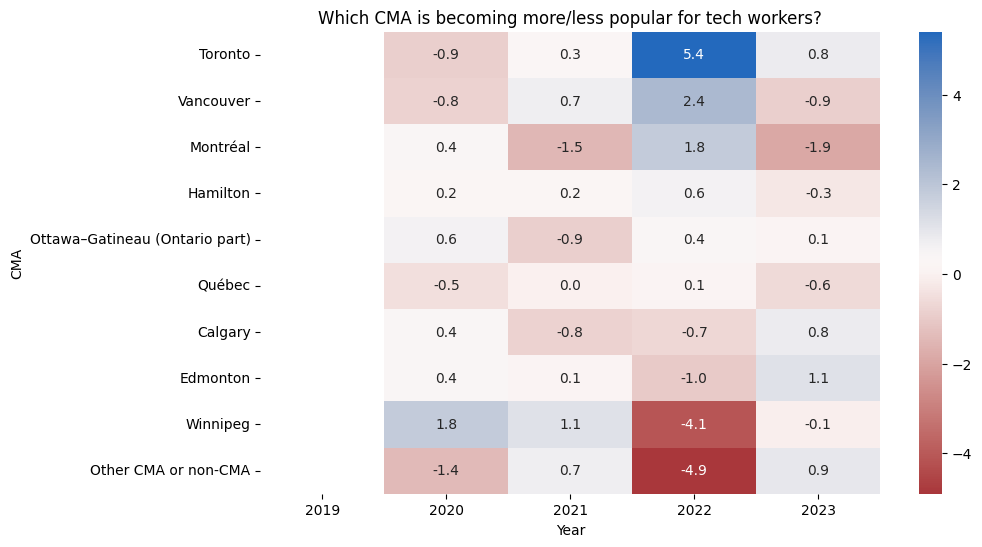

In [15]:
# Tech profession, noc_11, CMA residence distribution

# Calculate the total count per column
column_totals = filtered_noc_df.groupby('SURVYEAR').size()

# Create the pivot table with percentage calculation
pivot_table = filtered_noc_df.pivot_table(index='CMA', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table = (pivot_table.div(column_totals, axis=1) * 100).astype(float).round(1)

# Sort the values in ascending order based on value
sorted_pivot_table = pivot_table.sort_values(by=2022, ascending=False)

# Print the sorted pivot table
print(sorted_pivot_table)

# Calculate the difference between all columns
pivot_table_diff = pivot_table.diff(axis=1)

# Sort the values in ascending order based on value
pivot_table_diff = pivot_table_diff.sort_values(by=2022, ascending=False)

# Print the pivot table with the difference between columns
print(pivot_table_diff)

# Create a heatmap of the pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_diff, cmap='vlag_r', annot=True, fmt='.1f', cbar=True)

# Set the plot title and labels
plt.title('Which CMA is becoming more/less popular for tech workers?')
plt.xlabel('Year')
plt.ylabel('CMA')

# Display the heatmap
plt.show()

### Top 3 Tech talent cluster by size in 2022 (largest to smallest):
1. Toronto
1. Vancouver
1. Montreal

### Growing tech clusters (from 2021 to 2022)
1. Toronto
1. Vancouver
1. Montreal

The big three tech clusters in Canada are growing steadily and remain the top clusters in Canada.

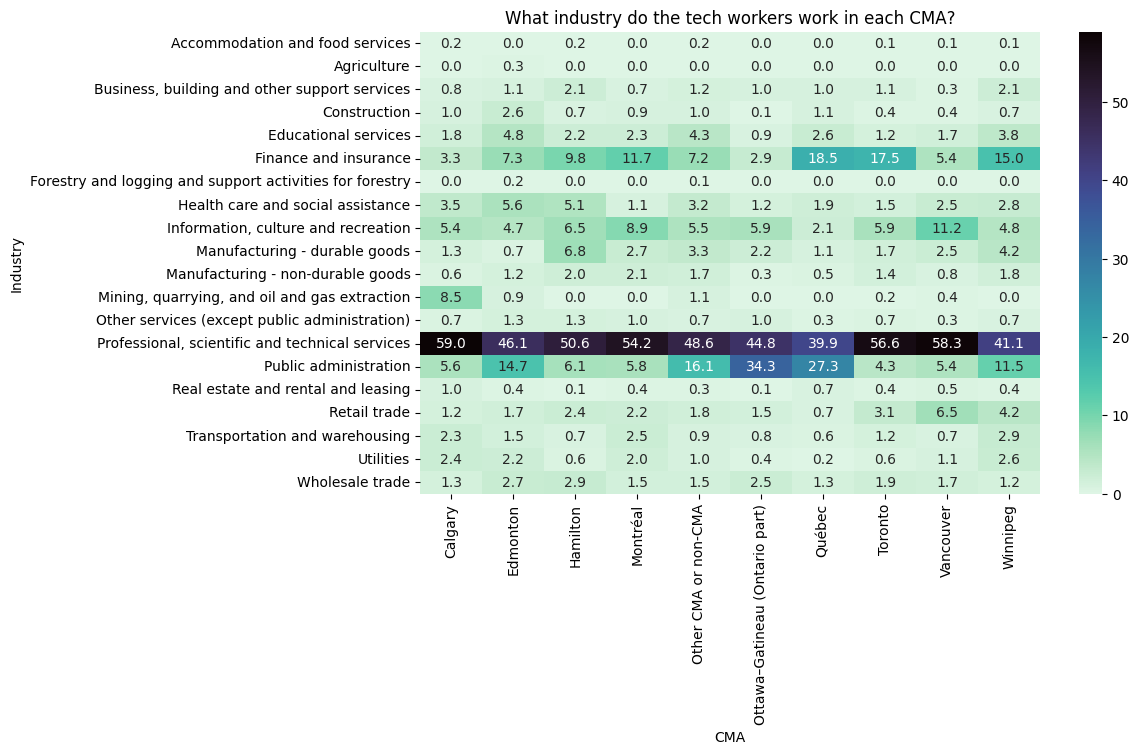

In [16]:
# What industry do the tech worker works in each CMA?

# Calculate the total count per column
column_totals = filtered_noc_df.groupby('CMA').size()

# Create the pivot table with percentage calculation
pivot_table = filtered_noc_df.pivot_table(index='NAICS_21', columns='CMA', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table = (pivot_table.div(column_totals, axis=1) * 100).astype(float)

# Create a heatmap of the pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='mako_r', annot=True, fmt='.1f', cbar=True)

# Set the plot title and labels
plt.title('What industry do the tech workers work in each CMA?')
plt.xlabel('CMA')
plt.ylabel('Industry')

# Display the heatmap
plt.show()

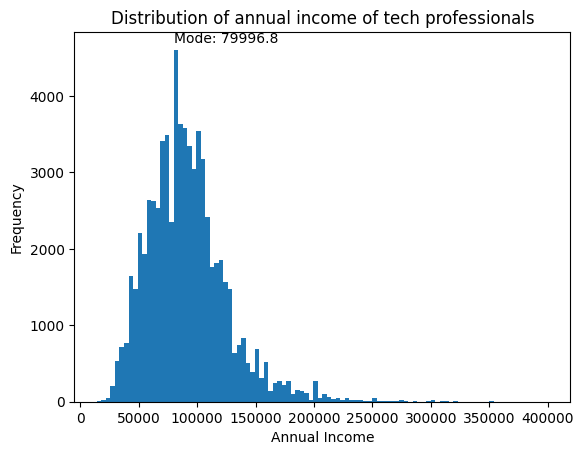

count     69645.00
mean      91463.91
std       34512.56
min       14393.60
25%       68473.60
50%       87526.40
75%      108576.00
max      400004.80
Name: HRLYEARN, dtype: float64
Average annual salary for tech workers: 
SURVYEAR                             2019      2020      2021       2022  \
CMA                                                                        
Calgary                         101725.94  98218.94  96336.92  106157.41   
Toronto                          88501.55  90715.16  92395.39  104226.72   
Ottawa–Gatineau (Ontario part)   96029.62  98161.77  96245.89  103223.41   
Vancouver                        87730.16  95363.01  98679.12  100914.83   
Edmonton                         89763.48  89654.38  89245.81   97272.44   
Montréal                         79650.02  86469.16  92826.97   93570.30   
Québec                           81036.24  88286.64  87372.93   92535.71   
Other CMA or non-CMA             80848.17  84136.31  88542.86   90867.16   
Hamilton        

In [17]:
# Average earning in tech professions - distribution

# Plot distribution
plt.hist(filtered_noc_df['HRLYEARN'], bins=100)

# Add a text annotation for the mode
mode_value = filtered_noc_df['HRLYEARN'].mode().values[0]
max_frequency = plt.gca().get_ylim()[1]
plt.text(mode_value, max_frequency, f"Mode: {mode_value}", ha='left', va='top')

plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of annual income of tech professionals')
plt.show()

# Calculate summary statistics
summary = filtered_noc_df['HRLYEARN'].describe().round(2)
print(summary)

# Average earning in tech professions - by CMA

# Calculate the total count per column
column_totals = filtered_noc_df.groupby('SURVYEAR').size()

# Create the pivot table with average hourly wage
pivot_table = filtered_noc_df.pivot_table(index='CMA', columns='SURVYEAR', values = 'HRLYEARN', aggfunc='mean', fill_value=0).round(2)

# Sort the values in ascending order based on value
pivot_table = pivot_table.sort_values(by=2022, ascending=False)

# Print the sorted pivot table
print(f"Average annual salary for tech workers: \n{pivot_table}\n")

# Which city has the largest increase in wage from 2021 to 2022?
percentage_difference = ((pivot_table[2022] - pivot_table[2021]) / pivot_table[2021]) * 100
percentage_difference = percentage_difference.sort_values(ascending=False).round(1)

# Print the percentage difference
print(f"Percentage change of average salary from 2021 to 2022: \n{percentage_difference}\n")

# Which city has the largest increase in wage from 2022 to 2023?
percentage_difference = ((pivot_table[2023] - pivot_table[2022]) / pivot_table[2022]) * 100
percentage_difference = percentage_difference.sort_values(ascending=False).round(1)

# Print the percentage difference
print(f"Percentage change of average salary from 2022 to 2023: \n{percentage_difference}\n")

In [18]:
# Average earning in tech professions for each educational level in each CMA

# Get unique values of the 'Category' variable
education = filtered_noc_df['EDUC'].unique()

# Generate pivot tables for each category
pivot_tables = {}
for education in education:
    pivot_table = filtered_noc_df[filtered_noc_df['EDUC'] == education].pivot_table(index='CMA', columns='SURVYEAR', values = 'HRLYEARN', aggfunc='mean', fill_value=0)
    pivot_table = (pivot_table.div(100).multiply(40).multiply(52)).astype(float).round(2)
    pivot_tables[education] = pivot_table

# Output the pivot tables
for education, pivot_table in pivot_tables.items():
    print(f"Average annual wage for {education}:\n{pivot_table}\n")
    
# Which city has the largest increase in wage from 2021 to 2022?
percentage_differences = {}
percentage_difference = ((pivot_table[2022] - pivot_table[2021]) / pivot_table[2021]) * 100
    
# Output the pivot tables
for education, pivot_table in pivot_tables.items():
    print(percentage_difference)
    


Average annual wage for Above bachelors degree:
SURVYEAR                              2019        2020        2021  \
CMA                                                                  
Calgary                         2072352.52  2000658.88  2076569.29   
Edmonton                        2031109.60  1935410.96  1891955.00   
Hamilton                        2104461.57  1947460.65  2457576.91   
Montréal                        1687378.08  1823655.45  2074953.71   
Other CMA or non-CMA            1865350.05  1851598.50  2008128.39   
Ottawa–Gatineau (Ontario part)  2226328.62  2074731.53  2108285.44   
Québec                          1696222.51  1725209.32  1864838.29   
Toronto                         1979329.44  1954884.74  2120130.38   
Vancouver                       2009080.19  2190928.98  2286580.78   
Winnipeg                        2033421.66  1784154.45  1792949.67   

SURVYEAR                              2022        2023  
CMA                                                   

### Earnings from the highest to lowest by CMA
1. Calgary
1. Toronto
1. Ottawa–Gatineau (Ontario part)

### Using other CMA or non-CMA as the "normal" raise in wage, the following cities experienced exceptional wage increase
1. Toronto (12.8%)
1. Calgary (10.2%)
1. Edmonton (9%)
1. Ottawa–Gatineau (Ontario part) (7.3%)
1. Québec (5.9%)

# Unemployment

In [19]:
# Why did Canadians leave the job?

# Calculate the total count per column
column_totals = combined_df.groupby('SURVYEAR')['WHYLEFTO'].count()

# Create the pivot table with percentage calculation
pivot_table = combined_df.pivot_table(index='WHYLEFTO', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table = (pivot_table.div(column_totals, axis=1) * 100).astype(float).round(1)

print(f"Why did Canadians leave their jobs? \n{pivot_table}\n")

Why did Canadians leave their jobs? 
SURVYEAR                                          2019  2020  2021  2022  2023
WHYLEFTO                                                                      
Job leavers, going to school                       6.7   4.1   4.0   5.5   5.1
Job leavers, other reasons                        14.2   7.7   9.7  14.7  13.5
Job leavers, own illness or disability             4.1   1.9   2.8   3.7   3.6
Job leavers, personal or family responsibilities   2.7   1.3   2.2   3.2   3.2
Job leavers, retired                               1.3   0.6   1.2   1.4   1.1
Job losers, laid off                              71.0  84.4  80.1  71.5  73.5



In [20]:
# How did they become unemployed?

# Calculate the total count per column
column_totals = filtered_noc_df.groupby('SURVYEAR')['FLOWUNEM'].count()

# Create the pivot table with percentage calculation
pivot_table = filtered_noc_df.pivot_table(index='FLOWUNEM', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table = (pivot_table.div(column_totals, axis=1) * 100).astype(float).round(1)

print(f"How did the tech workers become unemployed? \n{pivot_table}\n")

How did the tech workers become unemployed? 
SURVYEAR                                2019  2020  2021  2022  2023
FLOWUNEM                                                            
Future starts                            3.2   1.3   3.0   6.8   4.1
Job leavers                             14.5   9.9  12.1  19.8  19.6
Job losers, permanent layoff            50.4  54.5  59.5  34.1  43.3
Job losers, temporary layoff             2.7  13.4   1.9   0.6   2.1
Re-entrants, worked 1 year ago or less  29.2  20.9  23.5  38.6  30.9



In [21]:
# Why did they leave the job?

# Calculate the total count per column
column_totals = filtered_noc_df.groupby('SURVYEAR')['WHYLEFTO'].count()

# Create the pivot table with percentage calculation
pivot_table = filtered_noc_df.pivot_table(index='WHYLEFTO', columns='SURVYEAR', aggfunc='size', fill_value=0)

# Divide each value by the total count and multiply by 100 to get the percentage
pivot_table = (pivot_table.div(column_totals, axis=1) * 100).astype(float).round(1)

print(f"Why did the tech workers leave their jobs? \n{pivot_table}\n")

Why did the tech workers leave their jobs? 
SURVYEAR                                          2019  2020  2021  2022  2023
WHYLEFTO                                                                      
Job leavers, going to school                       5.3   3.3   3.4   4.7   2.1
Job leavers, other reasons                        26.0  13.0  15.2  26.7  34.0
Job leavers, own illness or disability             0.9   0.2   1.1   1.7   3.1
Job leavers, personal or family responsibilities   2.9   2.6   5.7   6.2   3.1
Job leavers, retired                               0.6   2.6   0.8   3.0   1.0
Job losers, laid off                              64.3  78.2  73.9  57.8  56.7

